# EMAIL-SPAM-DETECTION WITH MACHINE LEARNING

Weve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let's get started!

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import nltk #(natural language tool-kit)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\spam.csv",encoding='latin1' )
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2695,ham,And whenever you and i see we can still hook u...,NaN,NaN,NaN
2577,ham,Hey whats up? U sleeping all morning?,NaN,NaN,NaN
2022,spam,U can WIN å£100 of Music Gift Vouchers every w...,NaN,NaN,NaN
1577,ham,Remember all those whom i hurt during days of ...,NaN,NaN,NaN
4889,ham,Sounds like there could be a lot of time spent...,NaN,NaN,NaN
254,ham,"I'm back, lemme know when you're ready",NaN,NaN,NaN
5155,ham,MY NEW YEARS EVE WAS OK. I WENT TO A PARTY WIT...,NaN,NaN,NaN
3217,ham,Don know:)this week i'm going to tirunelvai da.,NaN,NaN,NaN
984,ham,Yo guess what I just dropped,NaN,NaN,NaN
2701,ham,"Hiya, sorry didn't hav signal. I haven't seen ...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## DATA CLEANING

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [8]:

#Renaming the columns for better understanding

df.rename(columns={'v1':'Variety' , 'v2':'Data'}, inplace=True)

#Renaming columns permanently so "inplace=True"
df.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Labelling in dataset

Variety values either showing 'ham' or "spam" , lets martk them with 0 and 1 respectively

In [9]:
encoder = LabelEncoder()
df['Variety'] = encoder.fit_transform(df['Variety']) #allotting 0,1
df.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   int32 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int32(1), object(4)
memory usage: 196.0+ KB


In [11]:
#from above info we can see that last 3 columns Unnamed:2 , Unnamed: 3 , Unnamed: 4 has a good amount of 
#null values , so drop those columns 

df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

#dropping columns permanently so "inplace=True"
df.head() 

,Variety,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check duplicates
df.duplicated().sum()

403

In [13]:
#delete duplicates
df = df.drop_duplicates(keep='first') 
df

,Variety,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df.isnull().sum()

Variety    0
Data       0
dtype: int64

In [15]:
df.sample(10)

,Variety,Data
944,0,I sent my scores to sophas and i had to do sec...
1728,0,As per your request 'Maangalyam (Alaipayuthe)'...
900,0,Probably money worries. Things are coming due ...
4030,0,"Sorry vikky, i'm Watching olave mandara movie ..."
4925,0,"Oh yes, why is it like torture watching england?"
908,0,WHITE FUDGE OREOS ARE IN STORES
4726,1,Had your mobile 10 mths? Update to the latest ...
734,0,Leaving to qatar tonite in search of an opport...
5060,0,"Sorry, I'll call you later. I am in meeting sir."
5251,0,"Yeah work is fine, started last week, all the ..."


### After Data Cleaning

In [16]:
df.shape

(5169, 2)

## EDA

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

### Count spam(1) and non-spam(0) mails

In [17]:
df['Variety'].value_counts()

0    4516
1     653
Name: Variety, dtype: int64

In [18]:

#For tokenize the words , need to dowload the 'punkt' module
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Words in each text

In [19]:

df['words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words
df.sample(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5112\2394586766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words


,Variety,Data,words
5058,1,Free video camera phones with Half Price line ...,25
2702,0,"Omw back to tampa from west palm, you hear wha...",13
1055,0,I'm at work. Please call,7
1504,0,Oh my God. I'm almost home,8
5210,0,Dai i downloaded but there is only exe file wh...,19
534,0,I've not called you in a while. This is hoping...,44
4179,0,"swhrt how u dey,hope ur ok, tot about u 2day.l...",17
1034,0,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,22
3097,0,This is all just creepy and crazy to me.,10
331,0,Maybe i could get book out tomo then return it...,16


### Sentences in each mail

In [20]:
df['sentence'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words
df.sample(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5112\2794721563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words


,Variety,Data,words,sentence
4598,0,Have you laid your airtel line to rest?,9,1
2479,1,Sppok up ur mob with a Halloween collection of...,25,1
4829,0,"The word \Checkmate\"" in chess comes from the ...",38,1
2076,0,"Trust me. Even if isn't there, its there.",12,2
4078,0,O i played smash bros &lt;#&gt; religiously.,14,1
1481,0,"I'm a guy, browsin is compulsory",8,1
1093,0,Well the weather in cali's great. But its comp...,44,5
3576,0,Yeah confirmed for you staying at that weekend,8,1
1157,0,He's an adult and would learn from the experie...,31,4
1392,0,"Thk shld b can... Ya, i wana go 4 lessons... H...",22,2


### Characters in each text

In [21]:
df['chars']= df['Data'].apply(len)
df.sample(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5112\1945805562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chars']= df['Data'].apply(len)


,Variety,Data,words,sentence,chars
810,0,S:)s.nervous &lt;#&gt; :),13,1,26
4229,0,And several to you sir.,6,1,23
2628,0,Haha... They cant what... At the most tmr forf...,16,2,65
914,0,"Call me da, i am waiting for your call.",11,1,39
322,0,cud u tell ppl im gona b a bit l8 cos 2 buses ...,29,2,107
6,0,Even my brother is not like to speak with me. ...,18,2,77
1152,0,Ok i go change also...,6,1,22
3060,0,What u talking bout early morning? It's almost...,15,2,66
2766,1,Married local women looking for discreet actio...,29,3,155
1629,0,Sounds like you have many talents! would you l...,19,2,83


### summary of spam mails

In [22]:
df[df['Variety'] == 1][['words','sentence','chars']].describe()

,words,sentence,chars
count,653.000000,653.000000,653.000000
mean,27.667688,2.967841,137.891271
std,7.008418,1.483201,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,8.000000,224.000000


### Statistics summary of Non-Spam mails

In [23]:
df[df['Variety'] == 0][['words','sentence','chars']].describe()

,words,sentence,chars
count,4516.000000,4516.000000,4516.000000
mean,17.120903,1.799601,70.459256
std,13.493725,1.278465,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,28.000000,910.000000


AS WE CAN SEE NON-SPAM MAILS HAVE LARGE NUMBER OF WORDS , CHARACTERS , SENTENCES IN COMPARE TO THE SPAM MAILS. SO THIS IS THE DIFFERENTIATING FACTOR

## HEAT MAP

[Text(0.5, 1.0, 'Heatmap of Correlated values \n')]

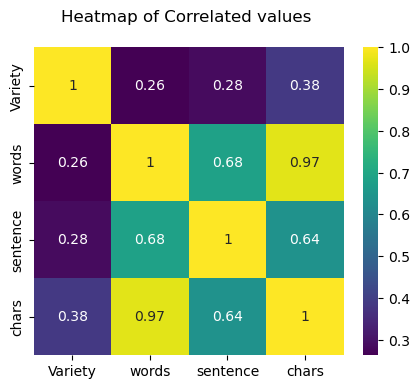

In [24]:
fig, ax = plt.subplots(figsize = (5, 4))
sea.heatmap(df.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')


## GRAPHICAL REPRESENTATION OF THE MAILS

### FOR WORDS

<Figure size 800x500 with 0 Axes>

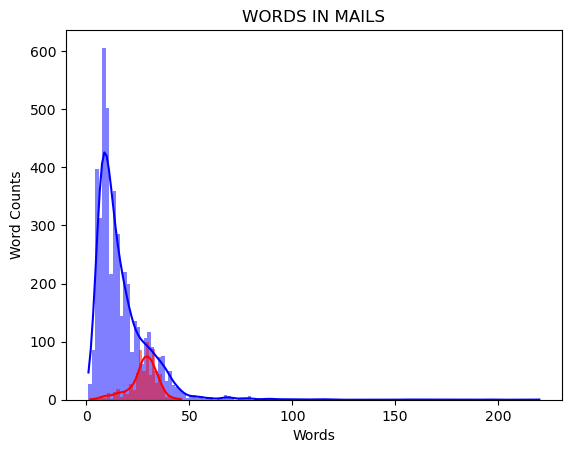

In [25]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['words'], color="blue", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['words'], color="red", kde=True, stat="count", linewidth=0 ,ax = ax)
ax.set_ylabel("Word Counts")
ax.set_xlabel( "Words")
ax.set_title( "WORDS IN MAILS") 
plt.show()

### FOR CHARACTERS

<Figure size 800x500 with 0 Axes>

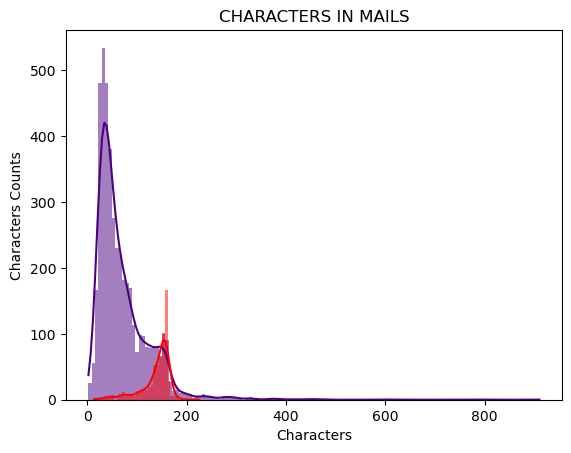

In [26]:

plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['chars'], color="indigo", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['chars'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Characters Counts")
ax.set_xlabel( "Characters")
ax.set_title( "CHARACTERS IN MAILS")
plt.show()

### FOR SENTENCES

<Figure size 800x500 with 0 Axes>

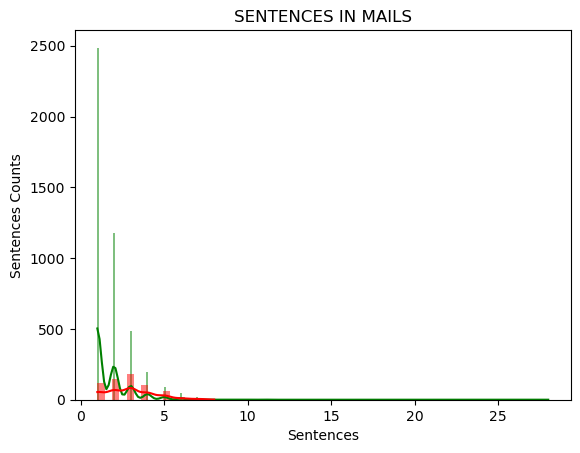

In [27]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['sentence'], color="green", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['sentence'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Sentences Counts")
ax.set_xlabel( "Sentences")
ax.set_title( "SENTENCES IN MAILS")
plt.show()

## Pairplot

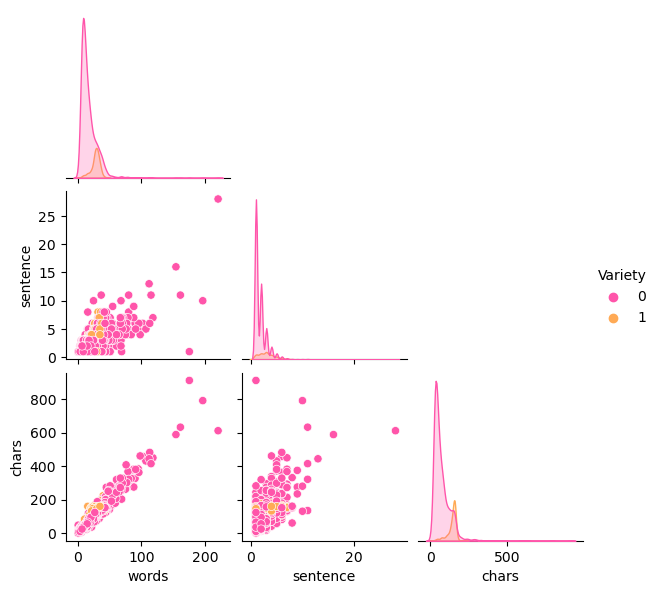

In [28]:
sea.pairplot(df,hue='Variety',corner=True,height=2,palette='spring');


## DATASET GAVING TOTAL OF SPAM AND NON-SPAM MAILS USING PIE CHART



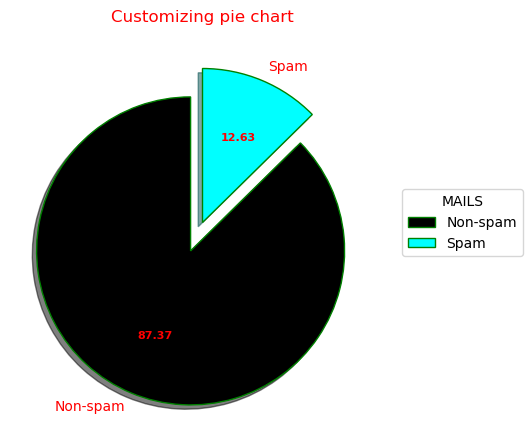

In [29]:
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "black", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(df['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

plt.show()


## TEXT PRE-PROCESSING
Text preprocessing involves transforming text into a clean and consistent format that can then be fed into a model for further analysis and learning.

### Looking for stopwords

In [30]:
!pip install wordcloud

In [31]:
from wordcloud import WordCloud

In [32]:
nltk.download('stopwords')
stopwords.words('english')[:10] 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### Looking for Punctuation marks



In [33]:
string.punctuation #shows all available punctuation marks

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Stemming method

In [34]:
ps = PorterStemmer()
ps.stem('played') #eg : play , playing , played can be shorten 

'play'

### function for all steps of Pre-processing

In [35]:
def changement(a):

    #LOWER CASE
    a = a.lower()

    #TOKENIZATION
    a = nltk.word_tokenize(a)
    
    #REMOVING SPECIAL CHARACTERS
    alphanum = []
    for i in a:
        if i.isalnum():
            alphanum.append(i)
    
    a = alphanum[:]
    alphanum.clear()
    
    #DELETE ALL STOPWORDS AND PUNCTUATION
    for i in a:
        if i not in stopwords.words('english') and i not in string.punctuation:
            alphanum.append(i)
            
    a = alphanum[:]
    alphanum.clear()
    
    #STEMMING
    for i in a:
        alphanum.append(ps.stem(i))
    
            
    return " ".join(alphanum)

### Pre-processing on the particular mail as examples

In [38]:
changement("The only problem with a pencil, is that they do not stay sharp long enough?")
     


'problem pencil stay sharp long enough'

In [39]:
changement("Last Chance! Claim ur å£150 worth of discount vouchers today! Text SHOP to 85023 now! SavaMob, offers mobile! T Cs SavaMob POBOX84, M263UZ.")
 

'last chanc claim ur worth discount voucher today text shop 85023 savamob offer mobil cs savamob pobox84 m263uz'

#### Apply Pre-processed texts to all dataset


In [41]:
df['pre-processed'] = df['Data'].apply(changement)
df.tail(8)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5112\3326098906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre-processed'] = df['Data'].apply(changement)


,Variety,Data,words,sentence,chars,pre-processed
5564,0,Why don't you wait 'til at least wednesday to ...,16,1,67,wait least wednesday see get
5565,0,Huh y lei...,4,1,12,huh lei
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,30,1,147,remind o2 get pound free call credit detail gr...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,9,1,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,1,125,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,7,2,26,rofl true name


### Check the dimensions again

In [43]:
df.shape

(5169, 6)

## WORDCLOUDS ON DATASET

### Apply Wordcloud to the NON-SPAM MAILS

In [44]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')


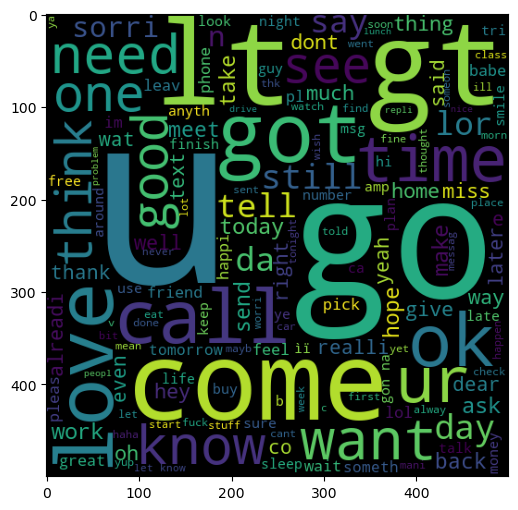

In [46]:
non_spam = wc.generate(df[df['Variety'] == 0]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(non_spam)

### Apply Wordcloud to the SPAM MAILS

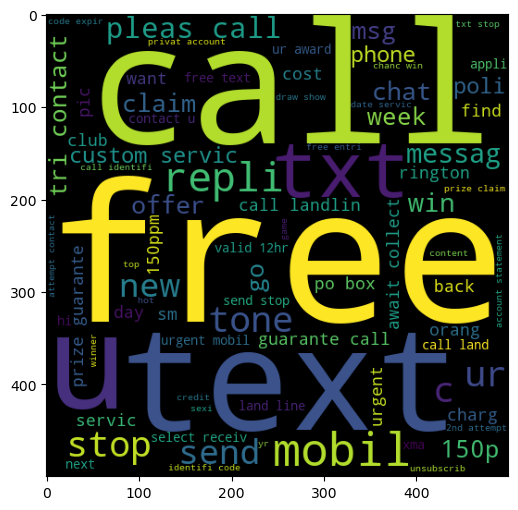

In [48]:
spam = wc.generate(df[df['Variety'] == 1]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam)

## MODEL BUILDING

### Assigning variable X and Y to columns

In [52]:
Y = df['Variety'].values
X = df['pre-processed']

In [53]:
X.shape

(5169,)

In [54]:
Y.shape

(5169,)

### Train-Test Split

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)


In [57]:
X_train.shape

(4135,)

In [58]:
print("Total No of Rows  :",X.shape[0])
print("Rows for training :",X_train.shape[0])
print("Rows for testing  :",X_test.shape[0])

Total No of Rows  : 5169
Rows for training : 4135
Rows for testing  : 1034


### Feature Extraction

In [59]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True',max_features=3000)


In [60]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
     

In [61]:
X_train_features.shape

(4135, 3000)

## TRAIN THE MODEL USING LOGISTIC REGRESSION

In [63]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

## Model Evaluation

## Prediction on training data

In [66]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)
     

Accuracy on training data :  0.966142684401451


### Prediction on testing data

In [68]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9477756286266924


## *EMAIL SPAM DETECTOR*

### Take User Input

In [72]:
user_mail = input("Enter the text of the email :\n\n")


Enter the text of the email :

Hi guravpooja,  You’re now part of the world’s largest data science community. Welcome, we’re glad you’re here!  Whether you’re new to machine learning or a renowned expert, we want to support you with powerful tools and resources to help you grow as a data scientist.


In [73]:
processed=changement(user_mail)
processed

'hi guravpooja part world largest data scienc commun welcom glad whether new machin learn renown expert want support power tool resourc help grow data scientist'

### Apply Feature Extraction

In [74]:
input_data_features = feature_extraction.transform([processed])

#print("After Feature Extraction :\n\n",input_data_features)
     

### Perform Prediction Over User Input

In [75]:
predicted_output = model.predict(input_data_features)

#print("Predicted Output :\n\n",predicted_output)

In [76]:
if (predicted_output[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')

Non-Spam mail


In [77]:
if (predicted_output[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')

Non-Spam mail


### Showed the "Non-spam mail" as result